In [30]:
import xml.etree.ElementTree as ET
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
tree = ET.parse('svg/tree.svg')
root = tree.getroot()

svg = list(root.findall('*'))[-1]

In [32]:
p = svg.find('{http://www.w3.org/2000/svg}path')

In [11]:
p.get('d')

AttributeError: 'NoneType' object has no attribute 'get'

In [33]:
from svg.path import parse_path

In [34]:
path = parse_path(p.get('d'))

AttributeError: 'NoneType' object has no attribute 'get'

In [29]:
points = [path.point(i/100) for i in range(100)]

KeyboardInterrupt: 

In [38]:
x_values = []
y_values = []

for p in list(root.findall('{http://www.w3.org/2000/svg}path')):
    path = parse_path(p.get('d'))
    num_points = int(path.length(error=1e-6)*0.5)
    print(num_points)
    points = [path.point(i/num_points, error=1e-6) for i in range(num_points)]
    x_values += [point.real for point in points]
    y_values += [point.imag for point in points]

45
871
319
15024


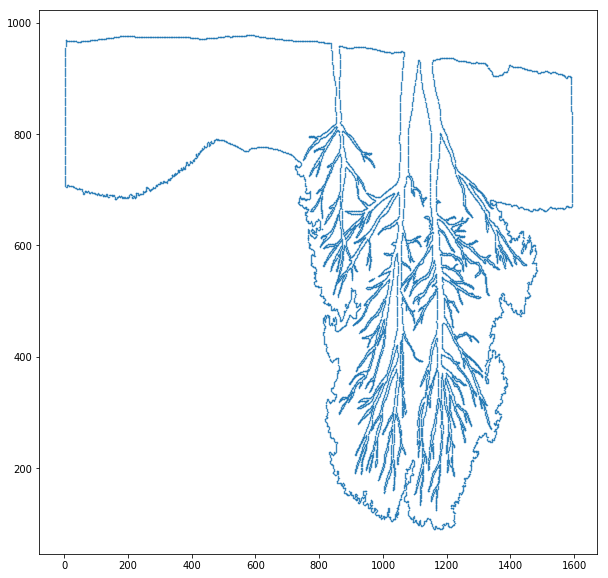

In [39]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(x_values, y_values, s=0.2)